NETFLIX DATA VISUALIZATION....!

In [1]:
#step-1 = importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#step-2 =load the data
data=pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.shape

(5332, 12)

In [5]:
#step-3 = handling and fixing missing values,duplicate values etc
data.isnull().sum()
data=data.dropna(subset=['director','cast','country','date_added','rating','duration'])

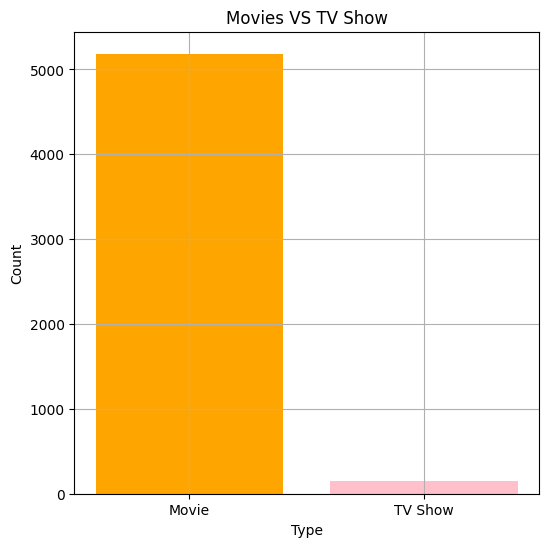

In [9]:
#bar chart for movies vs TV Show
type_counts=data['type'].value_counts()
plt.figure(figsize=(6,6))
plt.bar(type_counts.index,type_counts.values,color=['orange','pink'])
plt.xlabel("Type")
plt.ylabel("Count")
plt.title('Movies VS TV Show')
plt.grid()
plt.savefig('movie_TV.png')
plt.show()

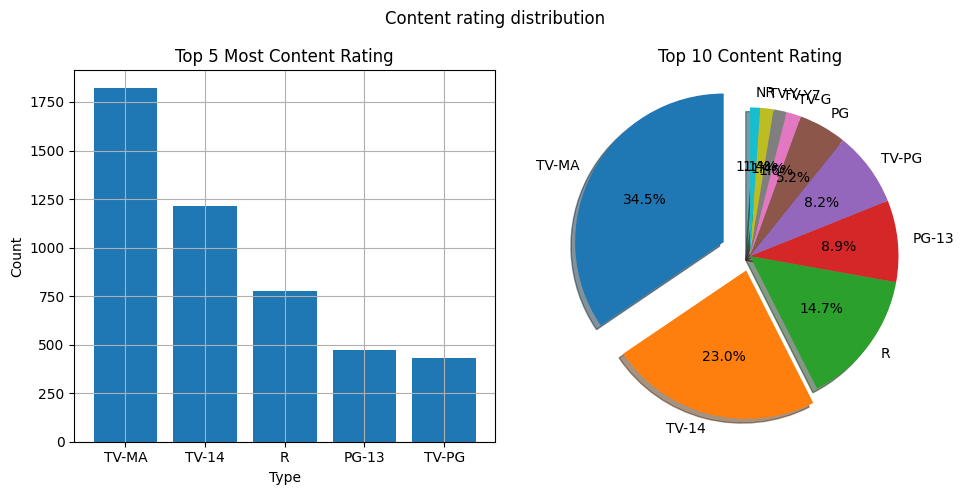

In [52]:
#pie and bar chart for content rating
rating_count=data['rating'].value_counts().head()
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].bar(rating_count.index,rating_count.values)
ax[0].set_xlabel("Type")
ax[0].set_ylabel("Count")
ax[0].set_title('Top 5 Most Content Rating')
ax[0].grid()

rating_counts=data['rating'].value_counts().head(10)
ax[1].pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',explode=[0.2,0.1,0,0,0,0,0,0,0,0],startangle=90,shadow=True) 
ax[1].set_title('Top 10 Content Rating')
fig.suptitle("Content rating distribution")
plt.tight_layout()
plt.show()

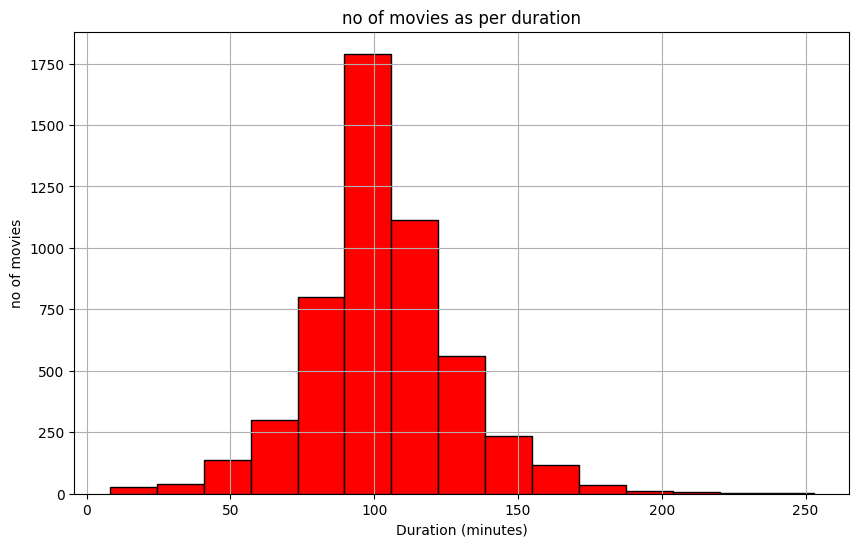

In [33]:
#bar chart for movies vs duration
movie_data=data[data['type']=='Movie'].copy()
movie_data['duration_int']=movie_data['duration'].str.replace(' min','').astype(int)
plt.figure(figsize=(10,6))
plt.hist(movie_data['duration_int'],bins=15,color="red",edgecolor='black')
plt.xlabel("Duration (minutes)")
plt.ylabel("no of movies")
plt.title("no of movies as per duration")
plt.grid()
plt.show()

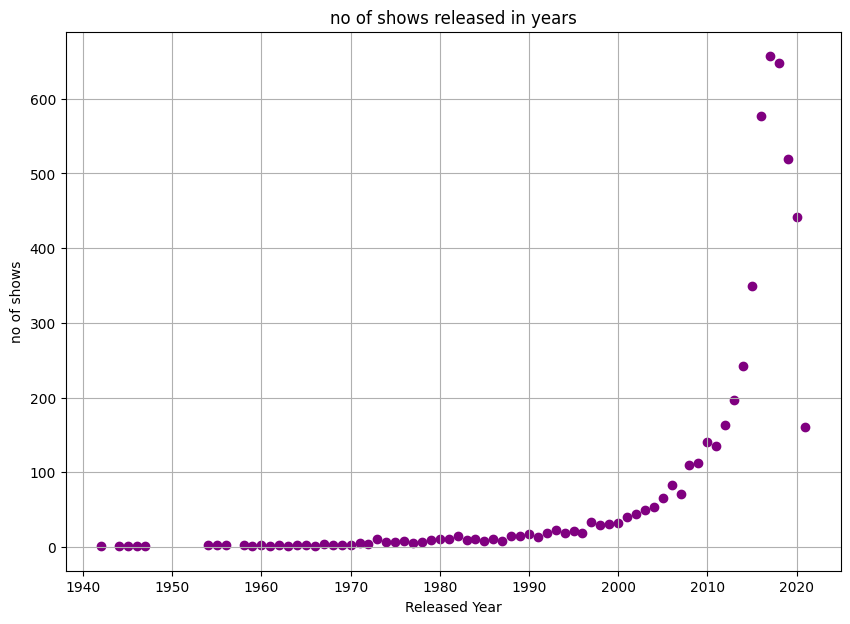

In [37]:
released_count=data['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.scatter(released_count.index,released_count.values,color="purple")
plt.xlabel("Released Year")
plt.ylabel("no of shows")
plt.title("no of shows released in years")
plt.grid()
plt.show()

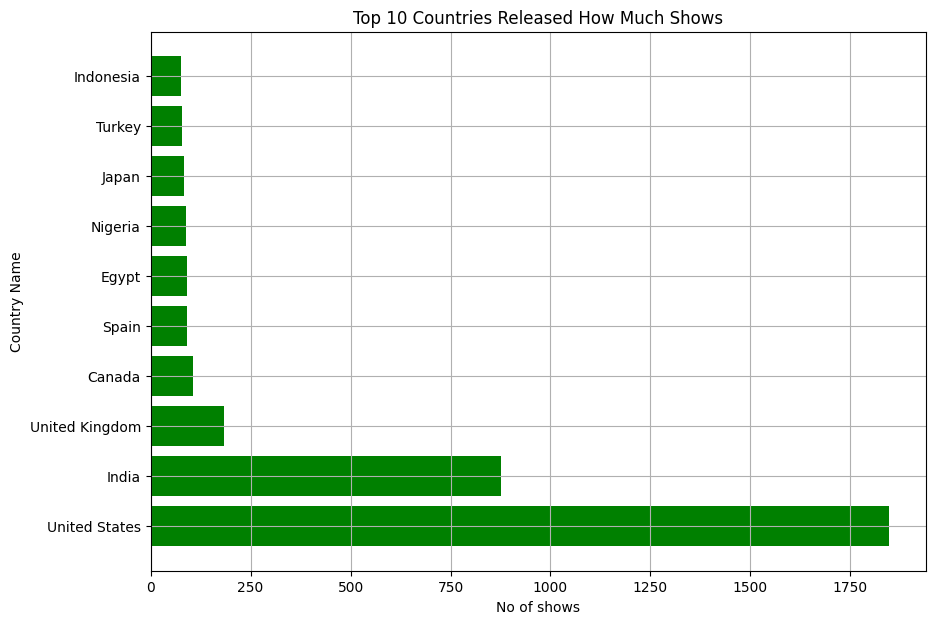

In [39]:
coutry_count=data['country'].value_counts().head(10)
plt.figure(figsize=(10,7))
plt.barh(coutry_count.index,coutry_count.values,color="green")
plt.xlabel("No of shows")
plt.ylabel("Country Name")
plt.title("Top 10 Countries Released How Much Shows")
plt.grid()
plt.show()

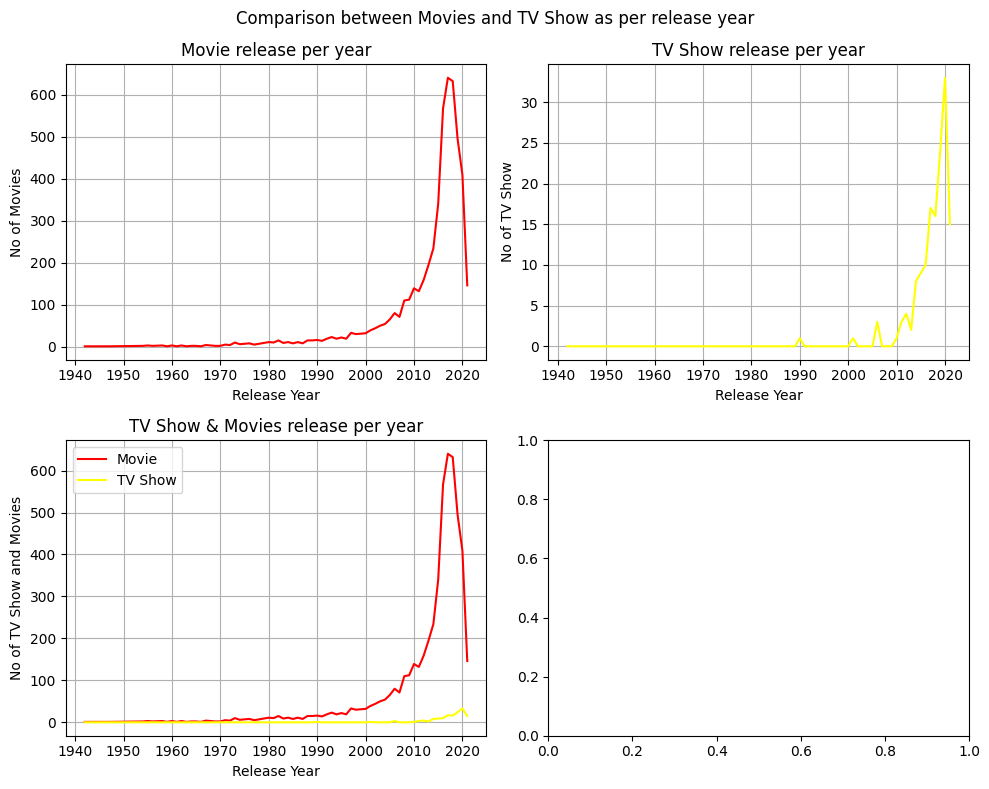

In [51]:
content_by_year=data.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(2,2,figsize=(10,8))
ax[0,0].plot(content_by_year.index,content_by_year['Movie'],color='red')
ax[0,0].set_title('Movie release per year')
ax[0,0].set_xlabel('Release Year')
ax[0,0].set_ylabel('No of Movies')
ax[0,0].grid()
ax[0,1].plot(content_by_year.index,content_by_year['TV Show'],color="yellow")
ax[0,1].set_title('TV Show release per year')
ax[0,1].set_xlabel('Release Year')
ax[0,1].set_ylabel('No of TV Show')
ax[0,1].grid()
ax[1,0].plot(content_by_year.index,content_by_year['Movie'],color='red',label='Movie')
ax[1,0].plot(content_by_year.index,content_by_year['TV Show'],color="yellow",label='TV Show')
ax[1,0].set_title('TV Show & Movies release per year')
ax[1,0].set_xlabel('Release Year')
ax[1,0].set_ylabel('No of TV Show and Movies')
ax[1,0].legend()
ax[1,0].grid()
fig.suptitle("Comparison between Movies and TV Show as per release year")
plt.tight_layout()
plt.show()